In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
plt.style.use('ggplot')

In [5]:

df = pd.read_csv('2021MCMProblemC_DataSet.csv')
classes = ['Positive ID', 'Negative ID', 'Unverified', 'Unprocessed']
colors = [['orange', 'teal', 'tab:pink', 'tab:brown'], ['red', 'blue', 'tab:purple', 'brown']]

df_negative = df.loc[df['Lab Status'] == 'Negative ID']
df_negative['Detection Date'] = pd.to_datetime(df_negative['Detection Date'], errors = 'coerce')
df_negative['Submission Date'] = pd.to_datetime(df_negative['Submission Date'], errors = 'coerce')
df_negative['D_Day'] = df_negative['Detection Date'].dt.day
df_negative['D_Month'] = df_negative['Detection Date'].dt.month
df_negative['D_Year'] = df_negative['Detection Date'].dt.year
df_negative['S_Day'] = df_negative['Submission Date'].dt.day
df_negative['S_Month'] = df_negative['Submission Date'].dt.month
df_negative['S_Year'] = df_negative['Submission Date'].dt.year
print(df_negative.head())
df_negative = df_negative.drop(['GlobalID', 'Lab Status', 'Lab Comments', 'Detection Date', 'Submission Date'], axis=1)
# df_negative = df_negative.drop(['GlobalID', 'Lab Status', 'Lab Comments', 'Detection Date', 'Submission Date'], axis=1)

In [6]:
df_negative.head()

,Notes,Latitude,Longitude,D_Day,D_Month,D_Year,S_Day,S_Month,S_Year
6,"I’m not sure what this is, but it was the bigg...",48.729596,-122.480035,29.0,2.0,2020.0,29,2,2020
8,"slow moving, i have this in the freezer still ...",47.395721,-123.105188,7.0,9.0,2019.0,18,3,2020
9,It landed on my window while working. It walke...,47.840041,-122.323562,19.0,3.0,2020.0,19,3,2020
12,Probably not an Asain Hornet but still a prett...,47.635058,-122.057332,30.0,8.0,2019.0,19,3,2020
14,Was on the garden hose. It stung (maybe just a...,48.743610,-122.439050,23.0,3.0,2020.0,24,3,2020


In [7]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_negative['Notes'])
df_negative = df_negative.drop(['Notes'], axis=1)
print(np.all(X.toarray()[0,:]) == 0)

True


In [8]:
# print(df_negative['Notes'])
# print(vectorizer.get_feature_names())

In [9]:
df_words = np.array(pd.DataFrame(X.toarray()))


In [10]:
df_negative = np.array(df_negative)
Xx = np.concatenate([df_words, df_negative], axis=1)
df = pd.DataFrame(Xx)
# df.drop(['3141'], axis=1)
# df

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,48.729596,-122.480035,29.0,2.0,2020.0,29.0,2.0,2020.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,47.395721,-123.105188,7.0,9.0,2019.0,18.0,3.0,2020.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,47.840041,-122.323562,19.0,3.0,2020.0,19.0,3.0,2020.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,47.635058,-122.057332,30.0,8.0,2019.0,19.0,3.0,2020.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,48.743610,-122.439050,23.0,3.0,2020.0,24.0,3.0,2020.0


In [12]:
scaler = RobustScaler()
norm = Normalizer()
X = scaler.fit_transform(df)
X = np.where(np.isfinite(X), X, 0)
X = norm.fit_transform(X)
# print(X.shape)
# X = X[~np.isnan(X).any(axis=1)]
# X = X[np.isfinite(X).any(axis=1)]
# print(np.isinf(X)

In [13]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=200, n_init=100)

K_cluster = kmeans.fit_predict(X)
# predictions = K_cluster.predict(X)
# df_predictions = X.assign(predictions=predictions)

In [14]:
df_predictions = df.copy()
df_predictions['labels'] = kmeans.labels_
df_predictions = df_predictions.drop(['Latitude', 'Longitude'], axis=1) # Remove lat/long columns

temp_arr = np.zeros(num_clusters, dtype = object)
for cluster in range(num_clusters):
    temp_arr[cluster] = np.array(df_predictions[df_predictions['labels']==cluster])

In [30]:
# Make dataframes, rename columns to be words
words = vectorizer.get_feature_names()
words.append('labels')

df_pred_0 = pd.DataFrame(temp_arr[0], columns=words)
df_pred_1 = pd.DataFrame(temp_arr[1], columns=words)
df_pred_2 = pd.DataFrame(temp_arr[2], columns=words)

# Drop labels column
# df = df[df.columns[:-1]]
df_pred_0 = df_pred_0[df_pred_0.columns[:-1]]
df_pred_1 = df_pred_1[df_pred_1.columns[:-1]]
df_pred_2 = df_pred_2[df_pred_2.columns[:-1]]

# Sum Counts
word_counts = np.zeros(num_clusters, dtype=object)
word_counts[0] = df_pred_0.sum(axis=0)
word_counts[1] = df_pred_1.sum(axis=0)
word_counts[2] = df_pred_2.sum(axis=0)

# Sort by word frequency
word_counts[0] = word_counts[0].sort_values(axis=0, ascending=False)
word_counts[1] = word_counts[1].sort_values(axis=0, ascending=False)
word_counts[2] = word_counts[2].sort_values(axis=0, ascending=False)



In [31]:
# print(word_counts[0].index)

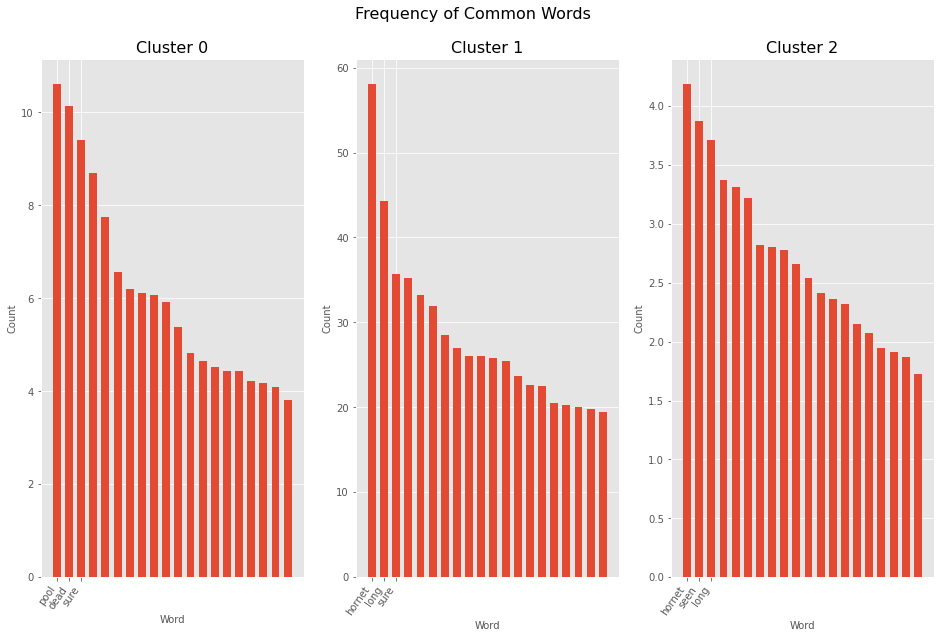

In [32]:
# Get top n words
num_words = 20
word_counts[0] = word_counts[0][0:num_words]
word_counts[1] = word_counts[1][0:num_words]
word_counts[2] = word_counts[2][0:num_words]

# Plot
num_rows = 1
num_cols = 3
category = ['Cluster 0', 'Cluster 1', 'Cluster 2']
fig1, axs1 = graph_words([word_counts[0].index, word_counts[1].index, word_counts[2].index], word_counts, num_rows, num_cols, category)

In [35]:
word_counts[0].index

Index(['pool', 'dead', 'sure', 'hornet', 'long', 'seen', 'wasp', 'wa', 'large',
       'like', 'inches', 'saw', 'bee', 'alive', 'flying', 'murder', 'huge',
       'killed', 'swimming', 'just'],
      dtype='object')

In [ ]:
# ========================================================
def graph_words(word_data, count_data, num_rows, num_cols, category, color1=None):

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16,9))
    data_sets = len(word_data)
    print(data_sets)
    i = 0
    # for r in range(num_rows): # num_rows + num_cols = num_subplots
    for c in range(num_cols):
        axis = np.arange(len(word_data[i]))
        if i==data_sets:
            break
        axs[c].bar(axis, count_data[i], width=0.65)
        axs[c].set_title(f'{category[i]}', fontsize=16)
        axs[c].set_xticks(np.arange(len(word_data[i])))
        axs[c].set_xticklabels(word_data[i], rotation = 55, ha='right', fontsize=10)
        axs[c].set_xlabel('Word', fontsize=10)
        axs[c].set_ylabel('Count', fontsize=10)
        # axs[r,c].tick_params(axis='both', labelsize=10)
        # axs[r,c].set_fontsize = 12
        i+=1
       
    left  = 0.125  # the left side of the subplots of the figure
    right = 0.9    # the right side of the subplots of the figure
    bottom = 0.1   # the bottom of the subplots of the figure
    top = 0.9      # the top of the subplots of the figure
    wspace = 0.2   # the amount of width reserved for blank space between subplots
    hspace = 0.3   # the amount of height reserved for white space between subplots
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.suptitle('Frequency of Common Words', fontsize=16)
    plt.show()
    return fig, axs
	# plt.legend()

8733


In [27]:
print(len(words*num_clusters))

hornet     58.121401
long       44.308585
sure       35.665919
seen       35.206246
large      33.201994
dead       31.912778
like       28.552315
asian      27.034556
saw        26.101355
yard       26.050349
bee        25.759733
inches     25.431799
big        23.717173
stinger    22.642144
wasp       22.571589
inch       20.561457
black      20.243790
ground     20.041176
yellow     19.790612
orange     19.457761
dtype: float64

In [29]:
word_counts[0]

str

In [50]:
type(words[0])

array([[0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.],
       ...,
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.]])

In [38]:
np.array(df_predictions[df_predictions['labels']==2])

,0,1,2,3,4,5,6,7,8,9,...,3132,3133,3134,3135,3136,3137,3138,3139,3140,labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [64]:
df_predictions.head()

3141


In [19]:
# Calculating TSNE and PCA
print('Doing PCA for MNIST...')
model_pca = TSNE(n_components=num_clusters, random_state=42)
pca = model_pca.fit_transform(X)
# pca = pca_m.transform(X)
print('Done...')

Doing PCA for MNIST...
Done...


In [71]:
# Calculating TSNE and PCA
print('Doing TSNE and PCA for MNIST...')
model_pca = PCA(n_components=num_clusters, random_state=42)
pca_m = model_pca.fit(X)
pca = pca_m.transform(X)

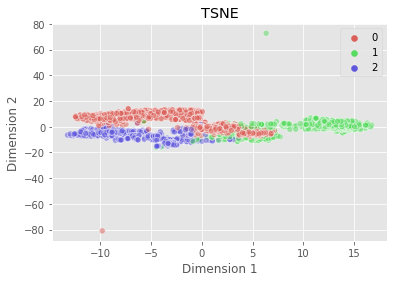

In [21]:
# Creating a plot of subplots for PCA
# plt.suptitle('MNIST')
# plt.subplot(1, 2, 1)
plt.title('TSNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
sns.scatterplot(x=pca[:,0],y=pca[:,1], hue=K_cluster, palette=sns.color_palette("hls", num_clusters), legend='full', alpha=0.5)

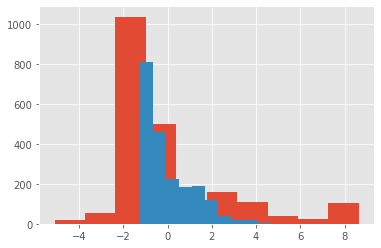

In [47]:
# Creating a plot of subplots for PCA
plt.suptitle('MNIST')
plt.subplot(1, 2, 1)
plt.title('PCA')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
sns.scatterplot(x=pca[:,0],y=pca[:,1], hue=K_cluster, palette=sns.color_palette("hls", 3), legend='full', alpha=0.5)
plt.show()

In [24]:
plt.hist(pca[:,0])
plt.hist(pca[:,1])
plt.show()

In [ ]:
# ========================================================
def graph_words(word_data, count_data, num_rows, num_cols, category, color1=None):

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16,9))
    data_sets = len(word_data)
    i = 0
    # for r in range(num_rows): # num_rows + num_cols = num_subplots
    for c in range(num_cols):
        axis = np.arange(len(word_data[0]))
        if i==data_sets:
            break
        axs[c].bar(axis, count_data[i], width=0.65)
        axs[c].set_title(f'{category[i]}', fontsize=16)
        axs[c].set_xticks(np.arange(len(word_data)))
        axs[c].set_xticklabels(word_data[i], rotation = 55, ha='right', fontsize=10)
        axs[c].set_xlabel('Word', fontsize=10)
        axs[c].set_ylabel('Count', fontsize=10)
        # axs[r,c].tick_params(axis='both', labelsize=10)
        # axs[r,c].set_fontsize = 12
        i+=1
       
    left  = 0.125  # the left side of the subplots of the figure
    right = 0.9    # the right side of the subplots of the figure
    bottom = 0.1   # the bottom of the subplots of the figure
    top = 0.9      # the top of the subplots of the figure
    wspace = 0.2   # the amount of width reserved for blank space between subplots
    hspace = 0.3   # the amount of height reserved for white space between subplots
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.suptitle('Frequency of Common Words', fontsize=16)
    plt.show()
    return fig, axs
	# plt.legend()
# ========================================================